In [1]:
import pandas
import pandas as pd
import os
import matplotlib.pyplot as plt

train_data_dir="training_data"
for filename in os.listdir(train_data_dir):
    if filename.endswith(".csv"):
        with open(os.path.join(train_data_dir,filename),"r") as f:
            df=pd.read_csv(f)

print(df.head())

print(df.Rating.value_counts())
# Key Observations:
#
# Most ratings are positive (4 and 5 stars account for over 56M ratings).
# Neutral ratings (3 stars) are also significant.
# Lower ratings (1 and 2 stars) are relatively fewer.

   MovieID  CustomerID  Rating        Date
0        1     1488844       3  2005-09-06
1        1      822109       5  2005-05-13
2        1      885013       4  2005-10-19
3        1       30878       4  2005-12-26
4        1      823519       3  2004-05-03
Rating
4    33750958
3    28811247
5    23168232
2    10132080
1     4617990
Name: count, dtype: int64


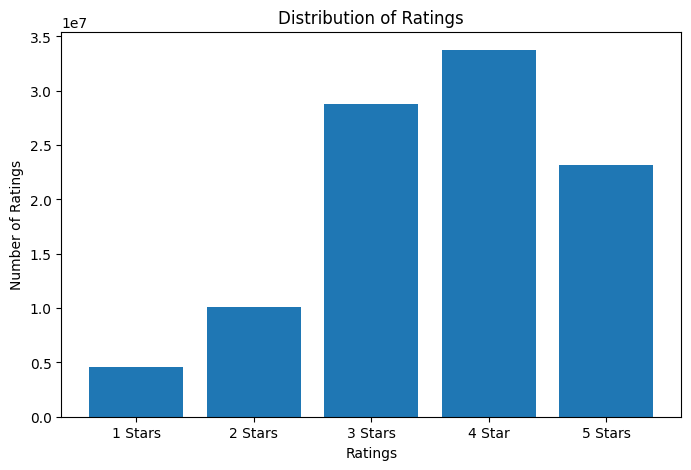

In [2]:
ratings = [4, 3, 5, 2, 1]
counts = [33750958, 28811247, 23168232, 10132080, 4617990]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(ratings, counts, tick_label=["4 Star", "3 Stars", "5 Stars", "2 Stars", "1 Stars"])
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.xticks(ratings)
plt.show()

   Month-Year    Rating
0     1999-11  3.428571
1     1999-12  3.335814
2     2000-01  3.281252
3     2000-02  3.344684
4     2000-03  3.334844
..        ...       ...
69    2005-08  3.682735
70    2005-09  3.692791
71    2005-10  3.711264
72    2005-11  3.681516
73    2005-12  3.668010

[74 rows x 2 columns]


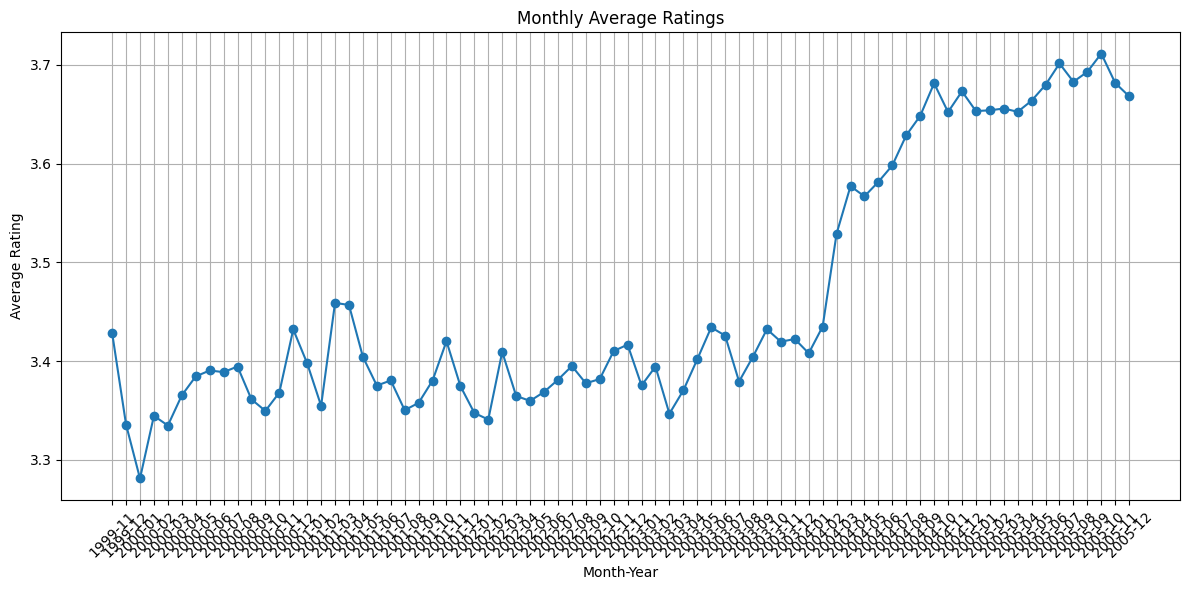

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('Month-Year')['Rating'].mean().reset_index()

# Display the monthly trend
print(monthly_trend)
# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['Month-Year'].astype(str), monthly_trend['Rating'], marker='o')
plt.title('Monthly Average Ratings')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()